# This application will predict the change in student test scores after a test preparation course, based on the demographics selected.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

### Reading the data into the program

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

### Example of the data in the datset

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Information about the score data, the average's, standard deviation, min, max, etc.)

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Ther following visulaization represents test score variation
## with regards to completing a test prep course

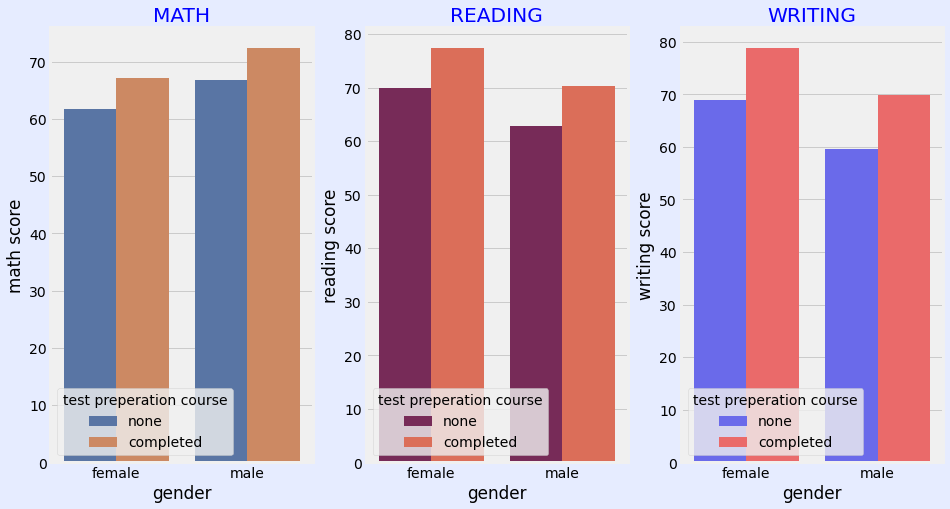

In [5]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(16,8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 3, 1)
sns.barplot(x='gender',y='math score',data=df,hue='test preparation course',palette='deep', ci=None)
plt.title('MATH' ,color='blue')
plt.legend(loc='lower left', title='test preperation course')
plt.subplot(1, 3, 2)
sns.barplot(x='gender',y='reading score',data=df,hue='test preparation course',palette='rocket', ci=None)
plt.title('READING' ,color='blue')
plt.legend(loc='lower left', title='test preperation course')
plt.subplot(1, 3, 3)
sns.barplot(x='gender',y='writing score',data=df,hue='test preparation course',palette='seismic', ci=None)
plt.title('WRITING' ,color='blue')
plt.legend(loc='lower left', title='test preperation course')
plt.show()

## The following visulazation represents the highest parental level of education 
## as percentages of the student dataset

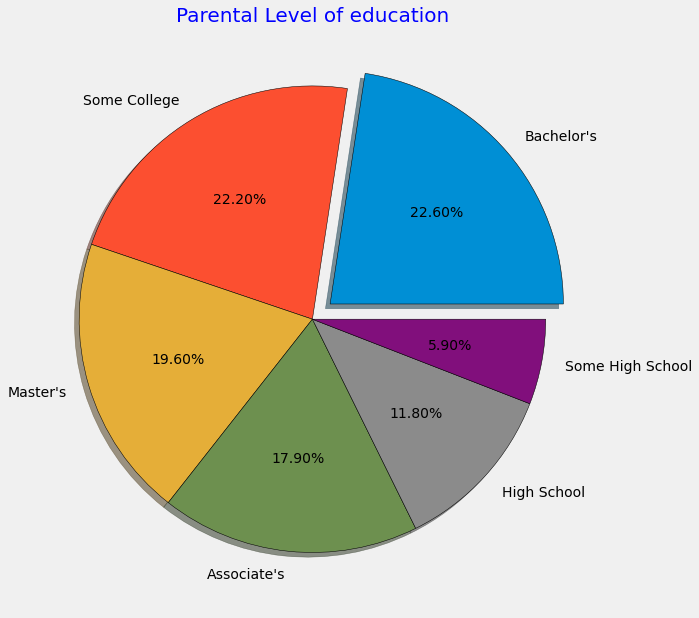

In [6]:
data=df['parental level of education'].value_counts()
plt.style.use('fivethirtyeight')
labels=['Bachelor\'s', 'Some College', 'Master\'s', 'Associate\'s', 'High School', 'Some High School']
explode=[0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(12,10))
plt.pie(data, labels=labels ,radius=1 ,autopct='%0.2f%%', explode=explode, shadow=True, wedgeprops={'edgecolor':'black'})
plt.title('Parental Level of education' ,fontsize=20 ,color='blue')
plt.show()

## The following visulazation represents the cumlative scores of the students
## with regards to the highest level of parental education

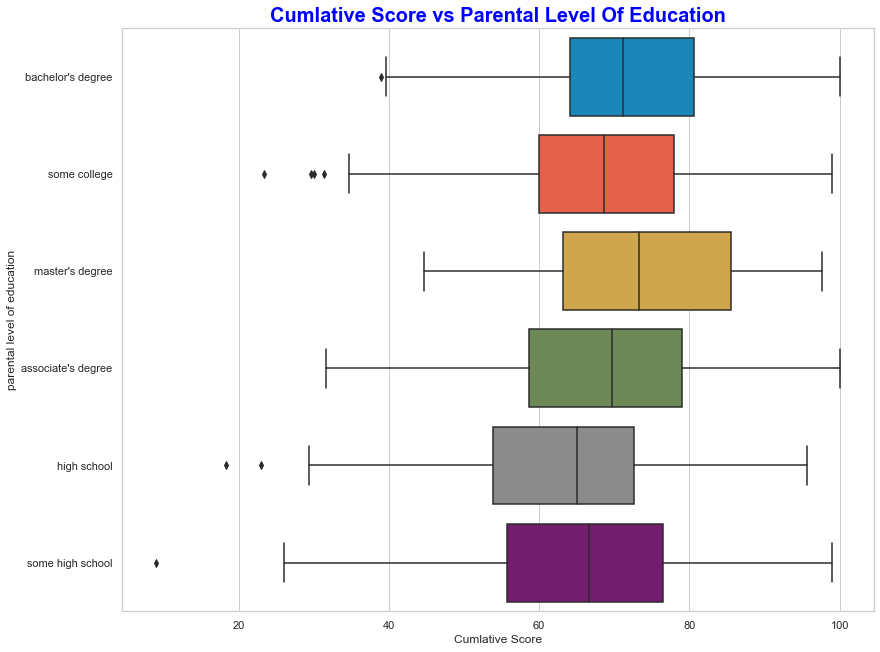

In [7]:
df['Cumlative Score'] = (df['math score']+df['reading score']+df['writing score'])/3
sns.set_style('whitegrid')
sns.set_context("notebook",font_scale=1)
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Cumlative Score', y='parental level of education')
plt.title('Cumlative Score vs Parental Level Of Education',fontsize=20, fontweight='bold', color='blue')

plt.show()

## We will now create the code to display the projected change in scores based on the completion of a test preparation course

In [8]:
def displayDelta(education_level):
    plt.style.use('fivethirtyeight')
    getDelta(education_level).plot(title='Projected Score change', figsize=(12,8))
    plt.xlabel('< Without a Prep Course -- With a Prep Course >')
    plt.legend(loc='lower right')

## This is the function to model the projected change in scores with a test preparation course based on the student populations average highest parental level of education

In [9]:
def getDelta(education_level):
    test1 = df.loc[(df['test preparation course'] == 'none') & (df['parental level of education'] == education_level)]
    dataFrame1 = test1.groupby('parental level of education').mean().round(2)
    test2 = df.loc[(df['test preparation course'] == 'completed') & (df['parental level of education'] == education_level)]
    dataFrame2 = test2.groupby('parental level of education').mean().round(2)
    result = dataFrame1.compare(dataFrame2, align_axis=0).rename(index={'self': 'No Prep', 'other': 'With prep'})
    return result

In [10]:
educationSelection = widgets.Dropdown(options =['some high school', 'high school', 'some college',
                                             "bachelor's degree", "associate's degree", "master's degree"],
                                     value="bachelor's degree", description="Average Parental Education Level",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))

# You can select the average education level below to see the scores and a visual representation of the changes a test prep course would make for a specific demographic.

In [11]:
widgets.interact(getDelta, education_level = educationSelection)
widgets.interact(displayDelta, education_level = educationSelection)

interactive(children=(Dropdown(description='Average Parental Education Level', index=3, layout=Layout(width='3…

interactive(children=(Dropdown(description='Average Parental Education Level', index=3, layout=Layout(width='3…

<function __main__.displayDelta(education_level)>